In [7]:
# Block 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [8]:
# Block 2: Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df = df.rename(columns={"Sex": "Gender", "Age": "ApplicantIncome", "Fare": "LoanAmount"})
df = df[["Gender", "ApplicantIncome", "LoanAmount", "Pclass", "Embarked", "Survived"]]
df.head()


,Gender,ApplicantIncome,LoanAmount,Pclass,Embarked,Survived
0,male,22.0,7.2500,3,S,0
1,female,38.0,71.2833,1,C,1
2,female,26.0,7.9250,3,S,1
3,female,35.0,53.1000,1,S,1
4,male,35.0,8.0500,3,S,0


In [9]:
# Block 3: Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           891 non-null    object 
 1   ApplicantIncome  714 non-null    float64
 2   LoanAmount       891 non-null    float64
 3   Pclass           891 non-null    int64  
 4   Embarked         889 non-null    object 
 5   Survived         891 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [10]:
# Block 4: Check missing values
df.isnull().sum()


Gender               0
ApplicantIncome    177
LoanAmount           0
Pclass               0
Embarked             2
Survived             0
dtype: int64

In [11]:
# Block 5: Fill missing values
df.loc[:, 'ApplicantIncome'] = df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



In [12]:
# Block 6: Convert categorical to numeric
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [13]:
# Block 7: Add artificial label column (1 = eligible, 0 = not eligible)
df['Loan_Approved'] = (df['Survived'] & (df['ApplicantIncome'] > 20) & (df['Pclass'] < 3)).astype(int)
df.drop("Survived", axis=1, inplace=True)


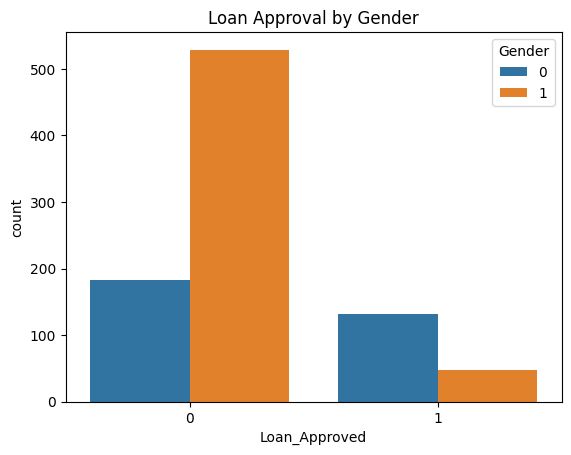

In [14]:
# Block 8: Visualize Loan Approval by Gender
sns.countplot(x='Loan_Approved', hue='Gender', data=df)
plt.title("Loan Approval by Gender")
plt.show()


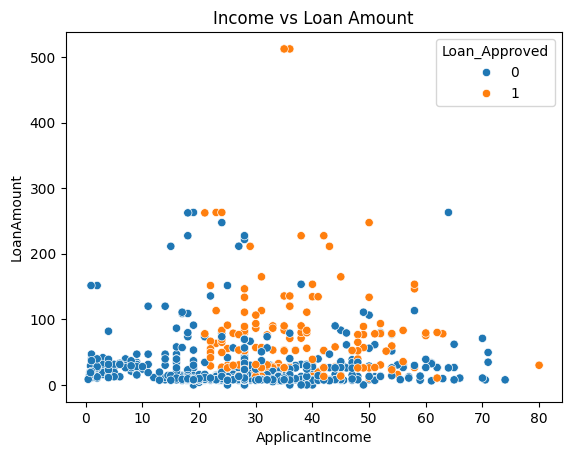

In [15]:
# Block 9: Loan Amount vs Income
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Approved', data=df)
plt.title("Income vs Loan Amount")
plt.show()


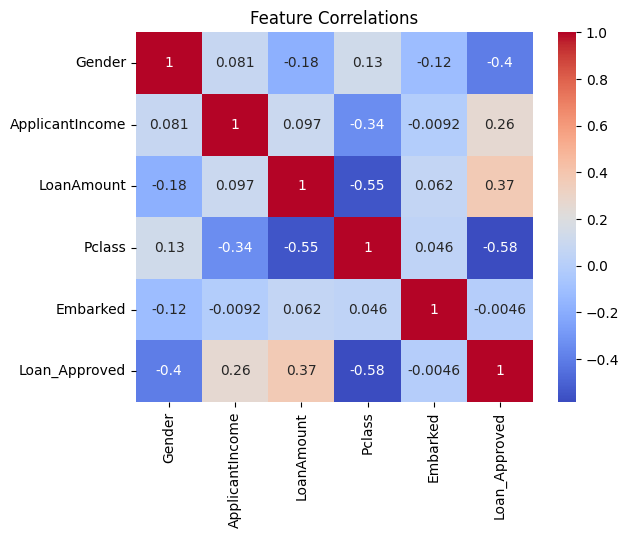

In [16]:
# Block 10: Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()


In [17]:
# Block 11: Features and Labels
X = df.drop("Loan_Approved", axis=1)
y = df["Loan_Approved"]


In [18]:
# Block 12: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Block 13: Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
# Block 14: Predictions and accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.8268156424581006

In [21]:
# Block 15: Predict sample data
sample = pd.DataFrame([[1, 50, 200, 1, 0]], columns=X.columns)
model.predict(sample)


array([0])

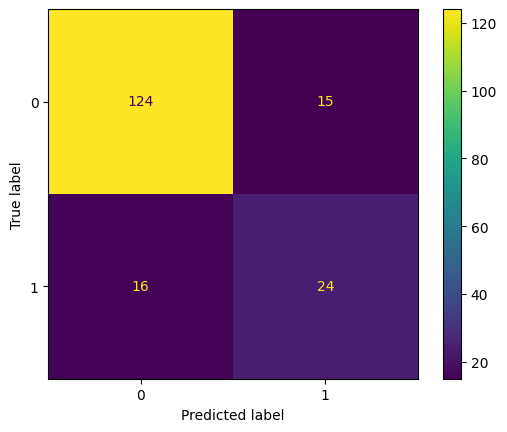

In [22]:
# Block 16: Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()
